In [2]:
#!/usr/bin/env python

In [3]:
import lasio as ls
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sys
from pathlib import Path
from scipy.interpolate import interp1d




In [46]:
import math

In [4]:
get_ipython().run_line_magic('matplotlib', 'notebook')

In [5]:
%matplotlib inline

In [6]:
well_5 = ls.read("C:\\Users\\DELL\\Documents\\Geo-python\\Python Codes\\Wabi-05.las")

In [7]:
#well_5.get_curve('SFLU_LCD_1')

In [8]:
#keys = well_5.keys()


In [9]:
#keys

In [10]:
myKeys = ['MD','GR_1','SWT_1']

In [11]:
df_5 = well_5.df().reset_index()


In [12]:
df_5.index

RangeIndex(start=0, stop=182544, step=1)

In [13]:
df_5.isnull().sum()

MD                              0
AHT10_3                     53191
AHT20_1                     49807
AHT30_1                     49807
AHT60_1                     49807
                            ...  
VPVS_1                      52236
WAV-RICKER_25HZ_ROT0_1_1     2595
WAV-RICKER_25HZ_ROT0_1_2     2595
ZOEP-REFL-EI-0_1             2575
ZOEP-REFL-EI-30_1           49908
Length: 133, dtype: int64

In [14]:
df_5_relevant = df_5[['MD','GR_1','LCD_SWE_1','LCD_SWT_1','DTCO_1','SWT_1','TVDSS_1','PHIE_1', 
         'PHIT_1','AHT20_1', 'AHT30_1', 'AHT60_1', 'AHT90_1','AHT90_3','VCL_1']]

In [15]:
df_5_relevant

,MD,GR_1,LCD_SWE_1,LCD_SWT_1,DTCO_1,SWT_1,TVDSS_1,PHIE_1,PHIT_1,AHT20_1,AHT30_1,AHT60_1,AHT90_1,AHT90_3,VCL_1
0,0.00000,NaN,NaN,NaN,NaN,NaN,-21.60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.20000,NaN,NaN,NaN,NaN,NaN,-21.40001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.20002,NaN,NaN,NaN,NaN,NaN,-21.39999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.40000,NaN,NaN,NaN,NaN,NaN,-21.20001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.40003,NaN,NaN,NaN,NaN,NaN,-21.19998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182539,5856.85407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182540,5964.07845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182541,6072.22503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182542,6181.27421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_5_relevant.describe()

,MD,GR_1,LCD_SWE_1,LCD_SWT_1,DTCO_1,SWT_1,TVDSS_1,PHIE_1,PHIT_1,AHT20_1,AHT30_1,AHT60_1,AHT90_1,AHT90_3,VCL_1
count,182544.000000,132734.000000,129336.000000,129336.000000,131974.000000,130110.000000,182127.000000,130759.000000,130759.000000,132737.000000,132737.000000,132737.000000,132737.000000,129353.000000,130759.000000
mean,2563.054326,72.235722,0.936415,0.941447,92.363248,0.960931,2363.698785,0.105818,0.169571,8.083987,8.809284,9.503932,9.273310,9.393917,0.304186
std,1196.337226,29.199819,0.181951,0.169904,12.170939,0.143983,1084.757524,0.100995,0.070997,18.424246,24.975915,34.149229,30.102361,30.468229,0.181302
min,0.000000,18.220000,0.000000,0.061800,53.308800,0.072000,-21.600000,0.000100,0.000100,0.263100,0.692100,0.413900,0.290700,0.646000,0.000000
25%,1782.127532,40.765860,1.000000,1.000000,83.960967,1.000000,1689.013335,0.001840,0.113820,2.052940,2.021050,2.014590,2.019260,2.050850,0.119130
50%,2716.619630,85.547555,1.000000,1.000000,92.404465,1.000000,2491.874330,0.088230,0.146540,3.175560,3.116170,3.040660,3.040370,3.069950,0.330640
75%,3555.961853,96.189922,1.000000,1.000000,100.485438,1.000000,3239.461940,0.189240,0.222320,7.431820,7.475700,7.407030,7.433300,7.377470,0.479865
max,6291.245110,189.940000,1.000000,1.000000,135.964710,1.000000,4074.790530,0.353460,0.379850,305.695890,462.426910,881.688480,810.287720,810.287720,0.691300


In [152]:
 """


fig,axs=plt.subplots(1,2, figsize=(5,12), sharey=True)

ax=axs[0]
ax.scatter(df_5_relevant['GR_1'], df_5_relevant['MD'],s=1)
ax.set_xlim(0,130)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [mbsf]', fontsize='large')
ax.grid()
#ax.fill_betweenx(df_5_relevant['MD'],df_5_relevant['GR_1'],70,
#                           where=df_5_relevant['GR_1']>70,interpolate=True,color='gray', label='shales')
#ax.fill_betweenx(df_5_relevant['MD'],df_5_relevant['GR_1'],70,
#                           where=df_5_relevant['GR_1']<70,interpolate=True,color='y', label='sands')
ax.axvline(70,color='k',linewidth=1,linestyle='--')
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(df_5_relevant['DTCO_1'], df_5_relevant['MD'],s=1)
ax.set_xlim(0,130)
ax.set_xlabel('DT [ft/s]', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()



"""
    






'\n\n\nfig,axs=plt.subplots(1,2, figsize=(5,12), sharey=True)\n\nax=axs[0]\nax.scatter(df_5_relevant[\'GR_1\'], df_5_relevant[\'MD\'],s=1)\nax.set_xlim(0,130)\nax.set_xlabel(\'GR [gAPI]\', fontsize=\'large\')\nax.set_ylabel(\'Measured Depth [mbsf]\', fontsize=\'large\')\nax.grid()\n#ax.fill_betweenx(df_5_relevant[\'MD\'],df_5_relevant[\'GR_1\'],70,\n#                           where=df_5_relevant[\'GR_1\']>70,interpolate=True,color=\'gray\', label=\'shales\')\n#ax.fill_betweenx(df_5_relevant[\'MD\'],df_5_relevant[\'GR_1\'],70,\n#                           where=df_5_relevant[\'GR_1\']<70,interpolate=True,color=\'y\', label=\'sands\')\nax.axvline(70,color=\'k\',linewidth=1,linestyle=\'--\')\nax.spines["top"].set_position(("axes", 1.0))\nax.legend()\nax.invert_yaxis()\n\nax=axs[1]\nax.scatter(df_5_relevant[\'DTCO_1\'], df_5_relevant[\'MD\'],s=1)\nax.set_xlim(0,130)\nax.set_xlabel(\'DT [ft/s]\', fontsize=\'large\')\nax.grid()\nax.spines["top"].set_position(("axes", 1.0))\nax.legend()\n\n\

In [153]:
 """
# In[19]:


fig,axs=plt.subplots(1,2, figsize=(5,8), sharey=True)

ax=axs[0]
ax.scatter(df_5_relevant['SWT_1'], df_5_relevant['MD'],s=1)
ax.set_xlim(0,1.0)
ax.set_xlabel('m3/m3', fontsize='large')
ax.grid()
#ax.fill_betweenx(df1['MD'],df1['SWT_1'],#0.25,
#                           where=df1['SWT_1']>0.25,interpolate=True,color='white', label='water')
#ax.fill_betweenx(df1['MD'],df1['SWT_1'],0.25,
 #                          where=df1['SWT_1']<0.25,interpolate=True,color='y', label='oil')
ax.axvline(0.25,color='k',linewidth=1,linestyle='--')
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()
ax.invert_yaxis()

"""

'\n# In[19]:\n\n\nfig,axs=plt.subplots(1,2, figsize=(5,8), sharey=True)\n\nax=axs[0]\nax.scatter(df_5_relevant[\'SWT_1\'], df_5_relevant[\'MD\'],s=1)\nax.set_xlim(0,1.0)\nax.set_xlabel(\'m3/m3\', fontsize=\'large\')\nax.grid()\n#ax.fill_betweenx(df1[\'MD\'],df1[\'SWT_1\'],#0.25,\n#                           where=df1[\'SWT_1\']>0.25,interpolate=True,color=\'white\', label=\'water\')\n#ax.fill_betweenx(df1[\'MD\'],df1[\'SWT_1\'],0.25,\n#                          where=df1[\'SWT_1\']<0.25,interpolate=True,color=\'y\', label=\'oil\')\nax.axvline(0.25,color=\'k\',linewidth=1,linestyle=\'--\')\nax.spines["top"].set_position(("axes", 1.0))\nax.legend()\nax.invert_yaxis()\n\n'

In [154]:
"""
fig,axs=plt.subplots(1,2, figsize=(5,8), sharey=True)

ax=axs[0]
ax.scatter(df_5_relevant['AHT90_1'], df_5_relevant['MD'],s=1)
ax.set_xlim(0,1000)
ax.set_xlabel('ohm-m', fontsize='large')
ax.grid()
"""

"\nfig,axs=plt.subplots(1,2, figsize=(5,8), sharey=True)\n\nax=axs[0]\nax.scatter(df_5_relevant['AHT90_1'], df_5_relevant['MD'],s=1)\nax.set_xlim(0,1000)\nax.set_xlabel('ohm-m', fontsize='large')\nax.grid()\n"

In [20]:
df_5_relevant_without_NaN  = df_5_relevant.dropna()


In [21]:
df_5_relevant_without_NaN.isnull().sum()

MD           0
GR_1         0
LCD_SWE_1    0
LCD_SWT_1    0
DTCO_1       0
SWT_1        0
TVDSS_1      0
PHIE_1       0
PHIT_1       0
AHT20_1      0
AHT30_1      0
AHT60_1      0
AHT90_1      0
AHT90_3      0
VCL_1        0
dtype: int64

Creating Water Saturation Column

In [22]:
list = []
for i in range(len(df_5_relevant_without_NaN)):
    list.append(0)
#df_5_relevant_without_NaN.assign(Water_Saturation = list)
df_5_relevant_without_NaN = df_5_relevant_without_NaN.assign(Water_Saturation = list)
df_5_relevant_without_NaN 

,MD,GR_1,LCD_SWE_1,LCD_SWT_1,DTCO_1,SWT_1,TVDSS_1,PHIE_1,PHIT_1,AHT20_1,AHT30_1,AHT60_1,AHT90_1,AHT90_3,VCL_1,Water_Saturation
51476,1983.33362,34.37971,1.0,1.0,118.83540,1.0,1864.93213,0.00010,0.01103,10.43210,5.47640,2.92540,3.63110,3.63110,0.06960,0
51477,1983.38196,34.24378,1.0,1.0,118.61725,1.0,1864.97359,0.00010,0.01096,15.66868,6.92295,3.22990,4.49049,4.49049,0.06912,0
51478,1983.40002,34.19299,1.0,1.0,118.53574,1.0,1864.98908,0.00010,0.01093,17.62508,7.46339,3.34366,4.81156,4.81156,0.06895,0
51479,1983.40003,34.19297,1.0,1.0,118.53570,1.0,1864.98909,0.00010,0.01093,17.62612,7.46367,3.34372,4.81173,4.81173,0.06895,0
51480,1983.44995,34.05259,1.0,1.0,118.31041,1.0,1865.03191,0.00010,0.01085,23.03391,8.95752,3.65817,5.69921,5.69921,0.06845,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180757,4349.60010,32.52651,1.0,1.0,68.53925,1.0,4034.48933,0.12634,0.14026,13.33740,12.36490,10.75633,9.94561,9.94561,0.05314,0
180758,4349.64844,32.48136,1.0,1.0,68.52970,1.0,4034.53756,0.12541,0.13953,13.34390,12.38200,10.77210,9.96950,9.96950,0.05390,0
180759,4349.64990,32.48000,1.0,1.0,68.52941,1.0,4034.53902,0.12541,0.13951,13.34415,12.38257,10.77260,9.97041,9.97041,0.05386,0
180760,4349.65843,32.42139,1.0,1.0,68.52773,1.0,4034.54753,0.12539,0.13944,13.34563,12.38592,10.77551,9.97572,9.97572,0.05360,0


In [23]:
df_5_relevant_without_NaN.isnull().sum()

MD                  0
GR_1                0
LCD_SWE_1           0
LCD_SWT_1           0
DTCO_1              0
SWT_1               0
TVDSS_1             0
PHIE_1              0
PHIT_1              0
AHT20_1             0
AHT30_1             0
AHT60_1             0
AHT90_1             0
AHT90_3             0
VCL_1               0
Water_Saturation    0
dtype: int64

In [155]:
def Water_Saturation_Archie(Porosity, Res_Lith, Res_Fluid, a, m, n):
   
    numerator = (a *  Res_Fluid)
    denominator  = (Porosity**m) * (Res_Lith)
    check = numerator / denominator
    ans = (check)**(1/n)
    return ans


In [49]:
def Water_Saturation_Semandoux(Porosity, Res_Lith, Res_Fluid, Rsh, Vsh , a, m, n):
    
    archie_part = (a *  Res_Fluid) / (Porosity**m  *2) 
    shale_ratio = Vsh/Rsh
    component = (4 * Porosity**m) / ( a *  Res_Fluid * Res_Lith)
    ans = archie_part * (math.sqrt(shale_ratio ** 2  + component) - shale_ratio)
    return ans

In [135]:
def Water_Saturation_Indonesia(Porosity, Res_Lith, Res_Fluid, Rsh, Vsh , a, m, n):
    numerator = math.sqrt(1/Res_Lith)
    denominator = (Vsh ** (1 - (0.5 * Vsh)) / math.sqrt(Rsh)) + math.sqrt((Porosity**m) / (a * Res_Fluid ))
    ans = (numerator / denominator) ** (2 / n)
    return ans

In [150]:
def Water_Saturation_Fertl(Porosity, Res_Lith, Res_Fluid, Vsh , a, m, alpha ):
    component = ((alpha * Vsh) / 2)
    main = math.sqrt(((a * Res_Fluid) / Res_Lith) + component ** 2) - component
    ans = (Porosity ** (-m / 2)) * main
    return ans

In [136]:
df_5_relevant_without_NaN['AHT90_3']

51476     3.63110
51477     4.49049
51478     4.81156
51479     4.81173
51480     5.69921
           ...   
180757    9.94561
180758    9.96950
180759    9.97041
180760    9.97572
180761    9.99958
Name: AHT90_3, Length: 129286, dtype: float64

In [137]:
#df_5_relevant_without_NaN['GR_1'].loc[df_5_relevant_without_NaN.index[56]]

In [138]:
df_5_relevant_without_NaN.isnull().sum()

MD                  0
GR_1                0
LCD_SWE_1           0
LCD_SWT_1           0
DTCO_1              0
SWT_1               0
TVDSS_1             0
PHIE_1              0
PHIT_1              0
AHT20_1             0
AHT30_1             0
AHT60_1             0
AHT90_1             0
AHT90_3             0
VCL_1               0
Water_Saturation    0
dtype: int64

In [139]:
"""
cutoff = 0
max = [];
for i in range(len(df_5_relevant_without_NaN)):
    #print (df_5_relevant_without_NaN['GR_1'].values[i]);
    if (df_5_relevant_without_NaN['GR_1'].values[i] < cutoff) and (df_5_relevant_without_NaN['VCL_1'].values[i]< 0) :
        df_5_relevant_without_NaN['Water_Saturation'].values[i] = Water_Saturation_Archie(Porosity=df_5_relevant_without_NaN['PHIT_1'].values[i],
                                                     Res_Lith=df_5_relevant_without_NaN['AHT90_3'].values[i],
                                                     Res_Fluid=0.2,
                                                     a = 2, m = 2, n= 1.8)
    else:
        
        df_5_relevant_without_NaN['Water_Saturation'].values[i] = Water_Saturation_Semandoux(Porosity=df_5_relevant_without_NaN['PHIT_1'].values[i],
                                                     Res_Lith=df_5_relevant_without_NaN['AHT90_3'].values[i],
                                                     Res_Fluid=0.2, Rsh = 0.646,
                                                     Vsh=df_5_relevant_without_NaN['VCL_1'].values[i],
                                                     a = 2, m = 1.5, n= 1.5)
"""

In [156]:
def Archie ():
    for i in range(len(df_5_relevant_without_NaN)):
        df_5_relevant_without_NaN['Water_Saturation'].values[i] = Water_Saturation_Archie(Porosity=df_5_relevant_without_NaN['PHIT_1'].values[i],
                                                     Res_Lith=df_5_relevant_without_NaN['AHT90_3'].values[i],
                                                     Res_Fluid=0.2,
                                                     a = 0.81, m = 1.7, n= 2)
        return df_5_relevant_without_NaN['Water_Saturation'];
    

In [130]:
def Semandoux ():
    for i in range(len(df_5_relevant_without_NaN)):
        df_5_relevant_without_NaN['Water_Saturation'].values[i] = Water_Saturation_Semandoux(Porosity=df_5_relevant_without_NaN['PHIE_1'].values[i],
                                                     Res_Lith=df_5_relevant_without_NaN['AHT90_3'].values[i],
                                                     Res_Fluid=0.2, Rsh = 1.68734,
                                                     Vsh=df_5_relevant_without_NaN['VCL_1'].values[i],
                                                     a = 1.45, m = 1.54, n= 1.5)
        return df_5_relevant_without_NaN['Water_Saturation'];

In [140]:
def Indonesia ():
    for i in range(len(df_5_relevant_without_NaN)):
        df_5_relevant_without_NaN['Water_Saturation'].values[i] = Water_Saturation_Indonesia(Porosity=df_5_relevant_without_NaN['PHIE_1'].values[i],
                                                     Res_Lith=df_5_relevant_without_NaN['AHT90_3'].values[i],
                                                     Res_Fluid=0.2, Rsh = 1.68734,
                                                     Vsh=df_5_relevant_without_NaN['VCL_1'].values[i],
                                                     a = 1.45, m = 1.54, n= 1.5)
        return df_5_relevant_without_NaN['Water_Saturation'];

In [145]:
def Fertl ():
    for i in range(len(df_5_relevant_without_NaN)):
        df_5_relevant_without_NaN['Water_Saturation'].values[i] = Water_Saturation_Fertl(Porosity=df_5_relevant_without_NaN['PHIE_1'].values[i],
                                                     Res_Lith=df_5_relevant_without_NaN['AHT90_3'].values[i],
                                                     Res_Fluid=0.2, 
                                                     Vsh=df_5_relevant_without_NaN['VCL_1'].values[i],
                                                     a = 1.45, m = 1.54, alpha= 0.3)
        return df_5_relevant_without_NaN['Water_Saturation'];

In [146]:
max

[]

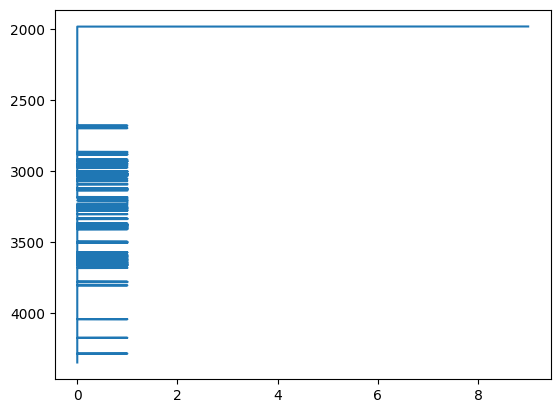

In [157]:

fig, ax = plt.subplots()
ax.plot(Archie(), df_5_relevant_without_NaN['MD'])
ax.invert_yaxis()



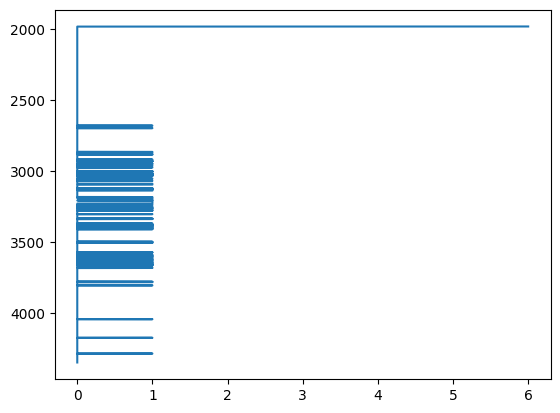

In [148]:

fig, ax = plt.subplots()
ax.plot(Semandoux(), df_5_relevant_without_NaN['MD'])
ax.invert_yaxis()



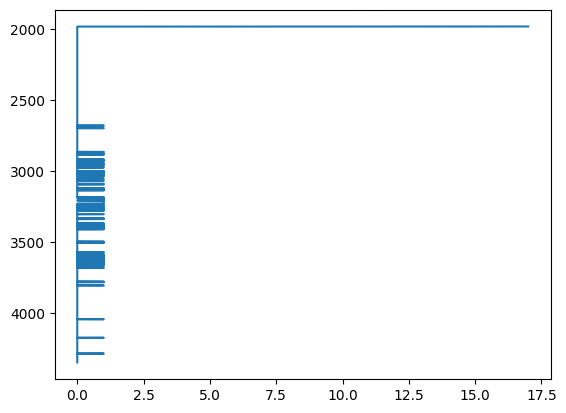

In [141]:

fig, ax = plt.subplots()
ax.plot(Indonesia(), df_5_relevant_without_NaN['MD'])
ax.invert_yaxis()



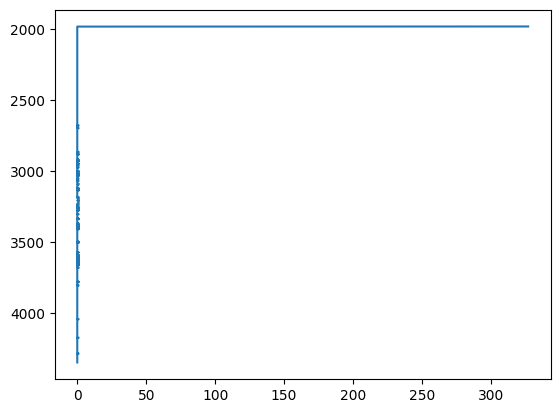

In [151]:

fig, ax = plt.subplots()
ax.plot(Fertl(), df_5_relevant_without_NaN['MD'])
ax.invert_yaxis()



In [67]:
df_5_relevant_without_NaN['Water_Saturation']

51476     43
51477     39
51478     37
51479     37
51480     34
          ..
180757     1
180758     1
180759     1
180760     1
180761     1
Name: Water_Saturation, Length: 129286, dtype: int64

In [134]:
df_5_relevant_without_NaN['AHT90_3']

51476     3.63110
51477     4.49049
51478     4.81156
51479     4.81173
51480     5.69921
           ...   
180757    9.94561
180758    9.96950
180759    9.97041
180760    9.97572
180761    9.99958
Name: AHT90_3, Length: 129286, dtype: float64

In [57]:
df_5_relevant_without_NaN.isnull().sum()

MD                  0
GR_1                0
LCD_SWE_1           0
LCD_SWT_1           0
DTCO_1              0
SWT_1               0
TVDSS_1             0
PHIE_1              0
PHIT_1              0
AHT20_1             0
AHT30_1             0
AHT60_1             0
AHT90_1             0
AHT90_3             0
VCL_1               0
Water_Saturation    0
dtype: int64

In [106]:
Water_Saturation(df_5_relevant_without_NaN['PHIT_1'].values[51476],
                                                     df_5_relevant_without_NaN['AHT90_3'].values[51476],
                                                     0.2,
                                                     2, 1.8, 1.8)

1.8062463726307894

In [170]:
df_5_relevant_without_NaN['PHIT_1'].values[120000]

0.10288

In [42]:

R_sh = df_5_relevant_without_NaN['AHT90_3'].values[70967]

1.68734